# Imports

In [61]:
import wrangle as wr
import explore as ex
import stats_conclude as sc
import evaluate as ev

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split

import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(123)

import warnings
warnings.filterwarnings("ignore")
import os

# Acquire

* 6 different CSV's imported from Jeff's local system using his credentials
* 1 CSV's kept for analysis
    * Invoice Profit Summary
<br>
* 1 .XLSX used for summary purposes
    * Summary
---

# Prepare

## Invoice Profit Summary
---
* 10880 rows × 12 columns **before** cleaning
* 10878 rows × 10 columns **after** cleaning
    * no nulls
    * the read_csv imported all columns as objects
        * dropped first two customers with indexes -1 and 0
        * changed date column to datetime
        * dropped percent_profit and amount_profit (derived columns)
        * changed from parts_cost:sale_total to floats and rounded to 2
* Contains: 
    * 'invoice' = *index* and **started at -1**
    * 'date': date of invoice sale
    * 'customer': name of customer
    * 'percent_profit': ***drop***
    * 'amount_profit': ***drop***
    * 'parts_cost': shop cost for parts
    * 'labor_cost': shop cost for labor
    * 'sublet_cost': work outsourced
    * 'total_cost': total shop cost
    * 'parts_sale': shop profit for parts
    * 'labor_sale': shop profit for labor
    * 'sublet_sale': work insourced
    * 'sale_total': total shop profit
    
* Remove Outliers
---
**Cost**: Shop **Credit**

**Sale**: Shop **Debit**

**Sublet**: Contracted Work (In/Out)

In [2]:
# get data
df_invoice = wr.get_data('invoice_profit_summ')
df_invoice

CSV File Found, Loading...


,date,customer,percent_profit,amount_profit,parts_cost,labor_cost,sublet_cost,total_cost,parts_sale,labor_sale,sublet_sale,sale_total
invoice,,,,,,,,,,,,
-1,4/1/14,"Owens, Bob",96.9,247.1,7.79,0,0,7.79,17.89,237,0,254.89
0,4/1/14,"Poole, Bill",100,150.1,0,0,0,0,0,150.1,0,150.1
1,4/2/14,"Williams, Arlene",76,173.36,54.86,0,0,54.86,109.72,118.5,0,228.22
2,4/1/14,"Higgins, Ryan",65.5,33.34,17.59,0,0,17.59,27.22,23.7,0,50.92
3,4/2/14,Dept. of Corrections,55.8,199.88,158.02,0,0,158.02,239.4,118.5,0,357.9
...,...,...,...,...,...,...,...,...,...,...,...,...
11328,5/31/23,"Beck, Rich",60.7,411.86,140.9,125.89,0,266.79,257.45,421.2,0,678.65
11329,5/31/23,"Culbertson, Bill",62.9,45.12,26.62,0,0,26.62,40.74,31,0,71.74
11330,5/31/23,UTV,100,680,0,0,0,0,0,680,0,680


In [3]:
# clean the data
df_invoice = wr.prep_invoice(df_invoice)
df_invoice

DataFrame acquired, cleaning...
Changed date to datetime type
Dropped percent and amount profit columns
Changed remining columns to floats, round to 2
DateFrame cleaned and ready for exploration


,date,customer,parts_cost,labor_cost,sublet_cost,total_cost,parts_sale,labor_sale,sublet_sale,sale_total,invoice
0,2014-04-02,"Williams, Arlene",54.86,0.00,0.0,54.86,109.72,118.5,0.0,228.22,0
1,2014-04-01,"Higgins, Ryan",17.59,0.00,0.0,17.59,27.22,23.7,0.0,50.92,1
2,2014-04-02,Dept. of Corrections,158.02,0.00,0.0,158.02,239.40,118.5,0.0,357.90,2
3,2014-04-03,"Grubb , Denny",47.01,0.00,0.0,47.01,92.59,268.6,0.0,361.19,3
4,2014-04-07,"Norland, Gary",420.09,0.00,0.0,420.09,526.77,197.5,0.0,724.27,4
...,...,...,...,...,...,...,...,...,...,...,...
10873,2023-05-31,"Beck, Rich",140.90,125.89,0.0,266.79,257.45,421.2,0.0,678.65,10873
10874,2023-05-31,"Culbertson, Bill",26.62,0.00,0.0,26.62,40.74,31.0,0.0,71.74,10874
10875,2023-05-31,UTV,0.00,0.00,0.0,0.00,0.00,680.0,0.0,680.00,10875
10876,2023-05-31,"Lopez, Sheryl",154.99,95.42,0.0,250.41,309.98,302.4,0.0,612.38,10876


In [4]:
# removed outliers
df_invoice = ex.remove_model_outliers(df_invoice)

Date is excluded from this function.
Customer is excluded from this function.
Invoice is excluded from this function.
-----------------------------------------
Outliers Calculated with IQR Ranges, multiplier 1.5
Parts cost between -148.66 and 289.54
Labor cost between -57.34 and 95.57
Sublet cost between 0.0 and 0.0
Total cost between -184.3 and 373.86
Parts sale between -258.45 and 513.82
Labor sale between -228.75 and 477.25
Sublet sale between 0.0 and 0.0
Sale total between -447.26 and 969.7

Outliers Removed: Percent Original Data Remaining: 93.0



In [5]:
df_invoice.dtypes

date           datetime64[ns]
customer               object
parts_cost            float64
labor_cost            float64
sublet_cost           float64
total_cost            float64
parts_sale            float64
labor_sale            float64
sublet_sale           float64
sale_total            float64
invoice                object
dtype: object

# Univariate Exploration

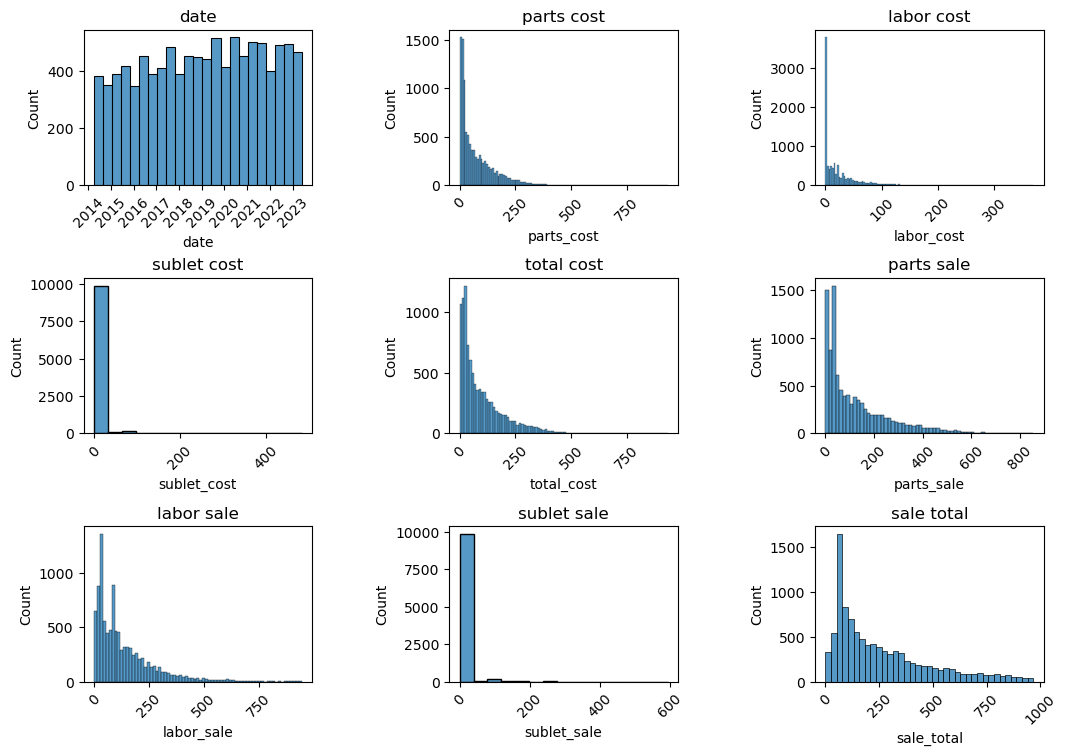

In [6]:
ex.univariate_hist(df_invoice.drop(columns={'customer','invoice'}))

In [7]:
ex.univariate_desc(df_invoice)

count                   10138
unique                   2330
top       2021-06-30 00:00:00
freq                       14
first     2014-04-01 00:00:00
last      2023-05-31 00:00:00
Name: date, dtype: object


count                         10138
unique                         2378
top       H&H BUSINESS SYSTEMS, INC
freq                            145
Name: customer, dtype: object


count    10138.000000
mean        70.774229
std         78.403588
min          0.000000
25%         14.800000
50%         40.415000
75%        107.365000
max        932.790000
Name: parts_cost, dtype: float64


count    10138.000000
mean        22.273946
std         31.368960
min          0.000000
25%          0.000000
50%         11.660000
75%         31.800000
max        369.250000
Name: labor_cost, dtype: float64


count    10138.000000
mean         2.135325
std         15.713313
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        483.950000
Name: sublet_cost,

# Feature Engineering 

* Working in df_invoice
---
* Profit Per Part
    * Parts Cost - Parts Sale
<br>    
* Profit Per Labor
    * Labor Cost - Labor Sale
<br>    
* Profit ***target***
    * Sale Total - Total Cost

In [8]:
df_invoice.head(1)

,date,customer,parts_cost,labor_cost,sublet_cost,total_cost,parts_sale,labor_sale,sublet_sale,sale_total,invoice
0,2014-04-02,"Williams, Arlene",54.86,0.0,0.0,54.86,109.72,118.5,0.0,228.22,0


In [9]:
# create profit per part engineered column
df_invoice['profit_per_part'] = df_invoice.parts_sale - df_invoice.parts_cost
df_invoice.head(1)

,date,customer,parts_cost,labor_cost,sublet_cost,total_cost,parts_sale,labor_sale,sublet_sale,sale_total,invoice,profit_per_part
0,2014-04-02,"Williams, Arlene",54.86,0.0,0.0,54.86,109.72,118.5,0.0,228.22,0,54.86


In [10]:
# create profit per labor engineered column
df_invoice['profit_per_labor'] = df_invoice.labor_sale - df_invoice.labor_cost
df_invoice.head(1)

,date,customer,parts_cost,labor_cost,sublet_cost,total_cost,parts_sale,labor_sale,sublet_sale,sale_total,invoice,profit_per_part,profit_per_labor
0,2014-04-02,"Williams, Arlene",54.86,0.0,0.0,54.86,109.72,118.5,0.0,228.22,0,54.86,118.5


In [11]:
# create profit engineered column *target*
df_invoice['profit'] = df_invoice.sale_total - df_invoice.total_cost
df_invoice.head(1)

,date,customer,parts_cost,labor_cost,sublet_cost,total_cost,parts_sale,labor_sale,sublet_sale,sale_total,invoice,profit_per_part,profit_per_labor,profit
0,2014-04-02,"Williams, Arlene",54.86,0.0,0.0,54.86,109.72,118.5,0.0,228.22,0,54.86,118.5,173.36


In [12]:
df_invoice.dtypes

date                datetime64[ns]
customer                    object
parts_cost                 float64
labor_cost                 float64
sublet_cost                float64
total_cost                 float64
parts_sale                 float64
labor_sale                 float64
sublet_sale                float64
sale_total                 float64
invoice                     object
profit_per_part            float64
profit_per_labor           float64
profit                     float64
dtype: object

In [13]:
# # drop derived columns
# df_model = df_model.drop(columns={'parts_cost','labor_cost','parts_sale','labor_sale'})
# df_model

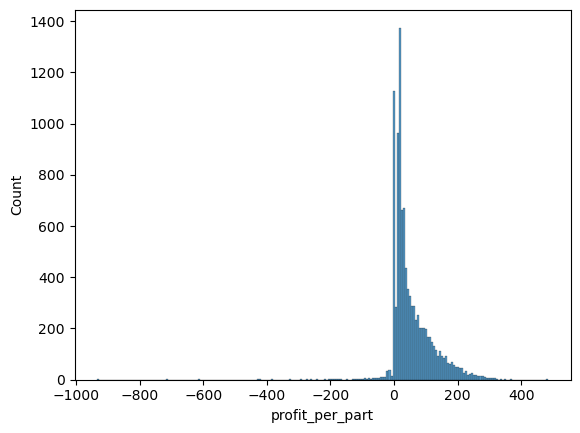

In [14]:
sns.histplot(data=df_invoice.profit_per_part);

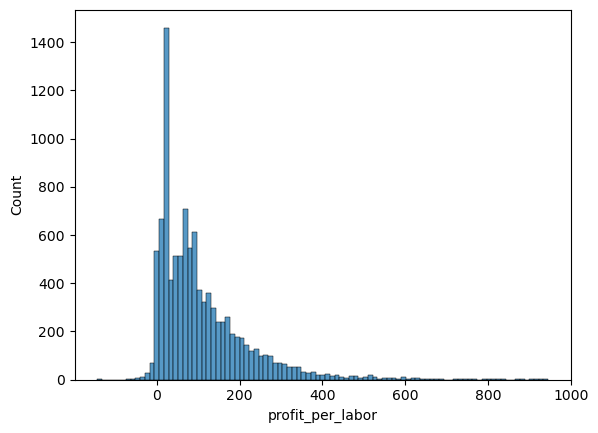

In [15]:
sns.histplot(data=df_invoice.profit_per_labor);

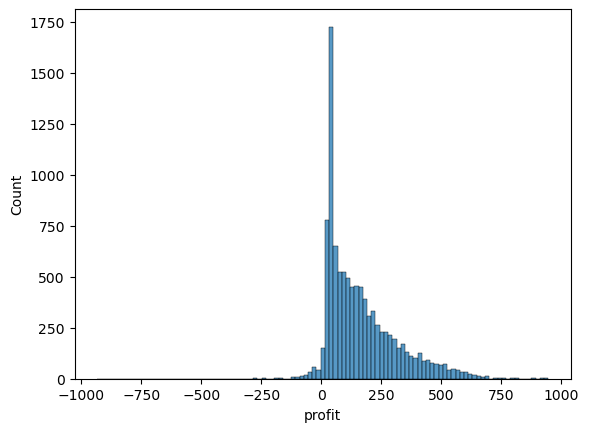

In [16]:
sns.histplot(data=df_invoice.profit);

# Preprocessing

## Train, Validate, Test Split

* NON-STRATIFY FOR REGRESSION

* remove outliers for scaling and modeling

In [17]:
df_model = df_invoice

In [18]:
df_model.dtypes

date                datetime64[ns]
customer                    object
parts_cost                 float64
labor_cost                 float64
sublet_cost                float64
total_cost                 float64
parts_sale                 float64
labor_sale                 float64
sublet_sale                float64
sale_total                 float64
invoice                     object
profit_per_part            float64
profit_per_labor           float64
profit                     float64
dtype: object

In [19]:
train, validate, test = ex.split_regression(df_invoice)

Prepared DF: (10138, 14)
Train: (6082, 14)
Validate: (2028, 14)
Test: (2028, 14)


In [20]:
train_model, validate_model, test_model = ex.split_regression(df_model.drop(columns=\
{'date','customer','invoice'}))

Prepared DF: (10138, 11)
Train: (6082, 11)
Validate: (2028, 11)
Test: (2028, 11)


## Standard Scaler

In [210]:
# all on the same measurable scale. I don't need to scale.... would it be more helpful for the algorithims if I did though?

# train_std_scaled, validate_std_scaled, test_std_scaled = ex.standard_scaler(train_model, validate_model, test_model)

# Mulitvariate Exploration

> ***Working in df_invoice for readability***

---

**Questions**

1. Is there a relationship between labor sale and parts sale?
2. Is there a relationship labor cost and parts cost?
3. Is the mean of parts cost equal to the mean of parts sale?
4. Is the mean of labor cost equal to the mean of labor sale?

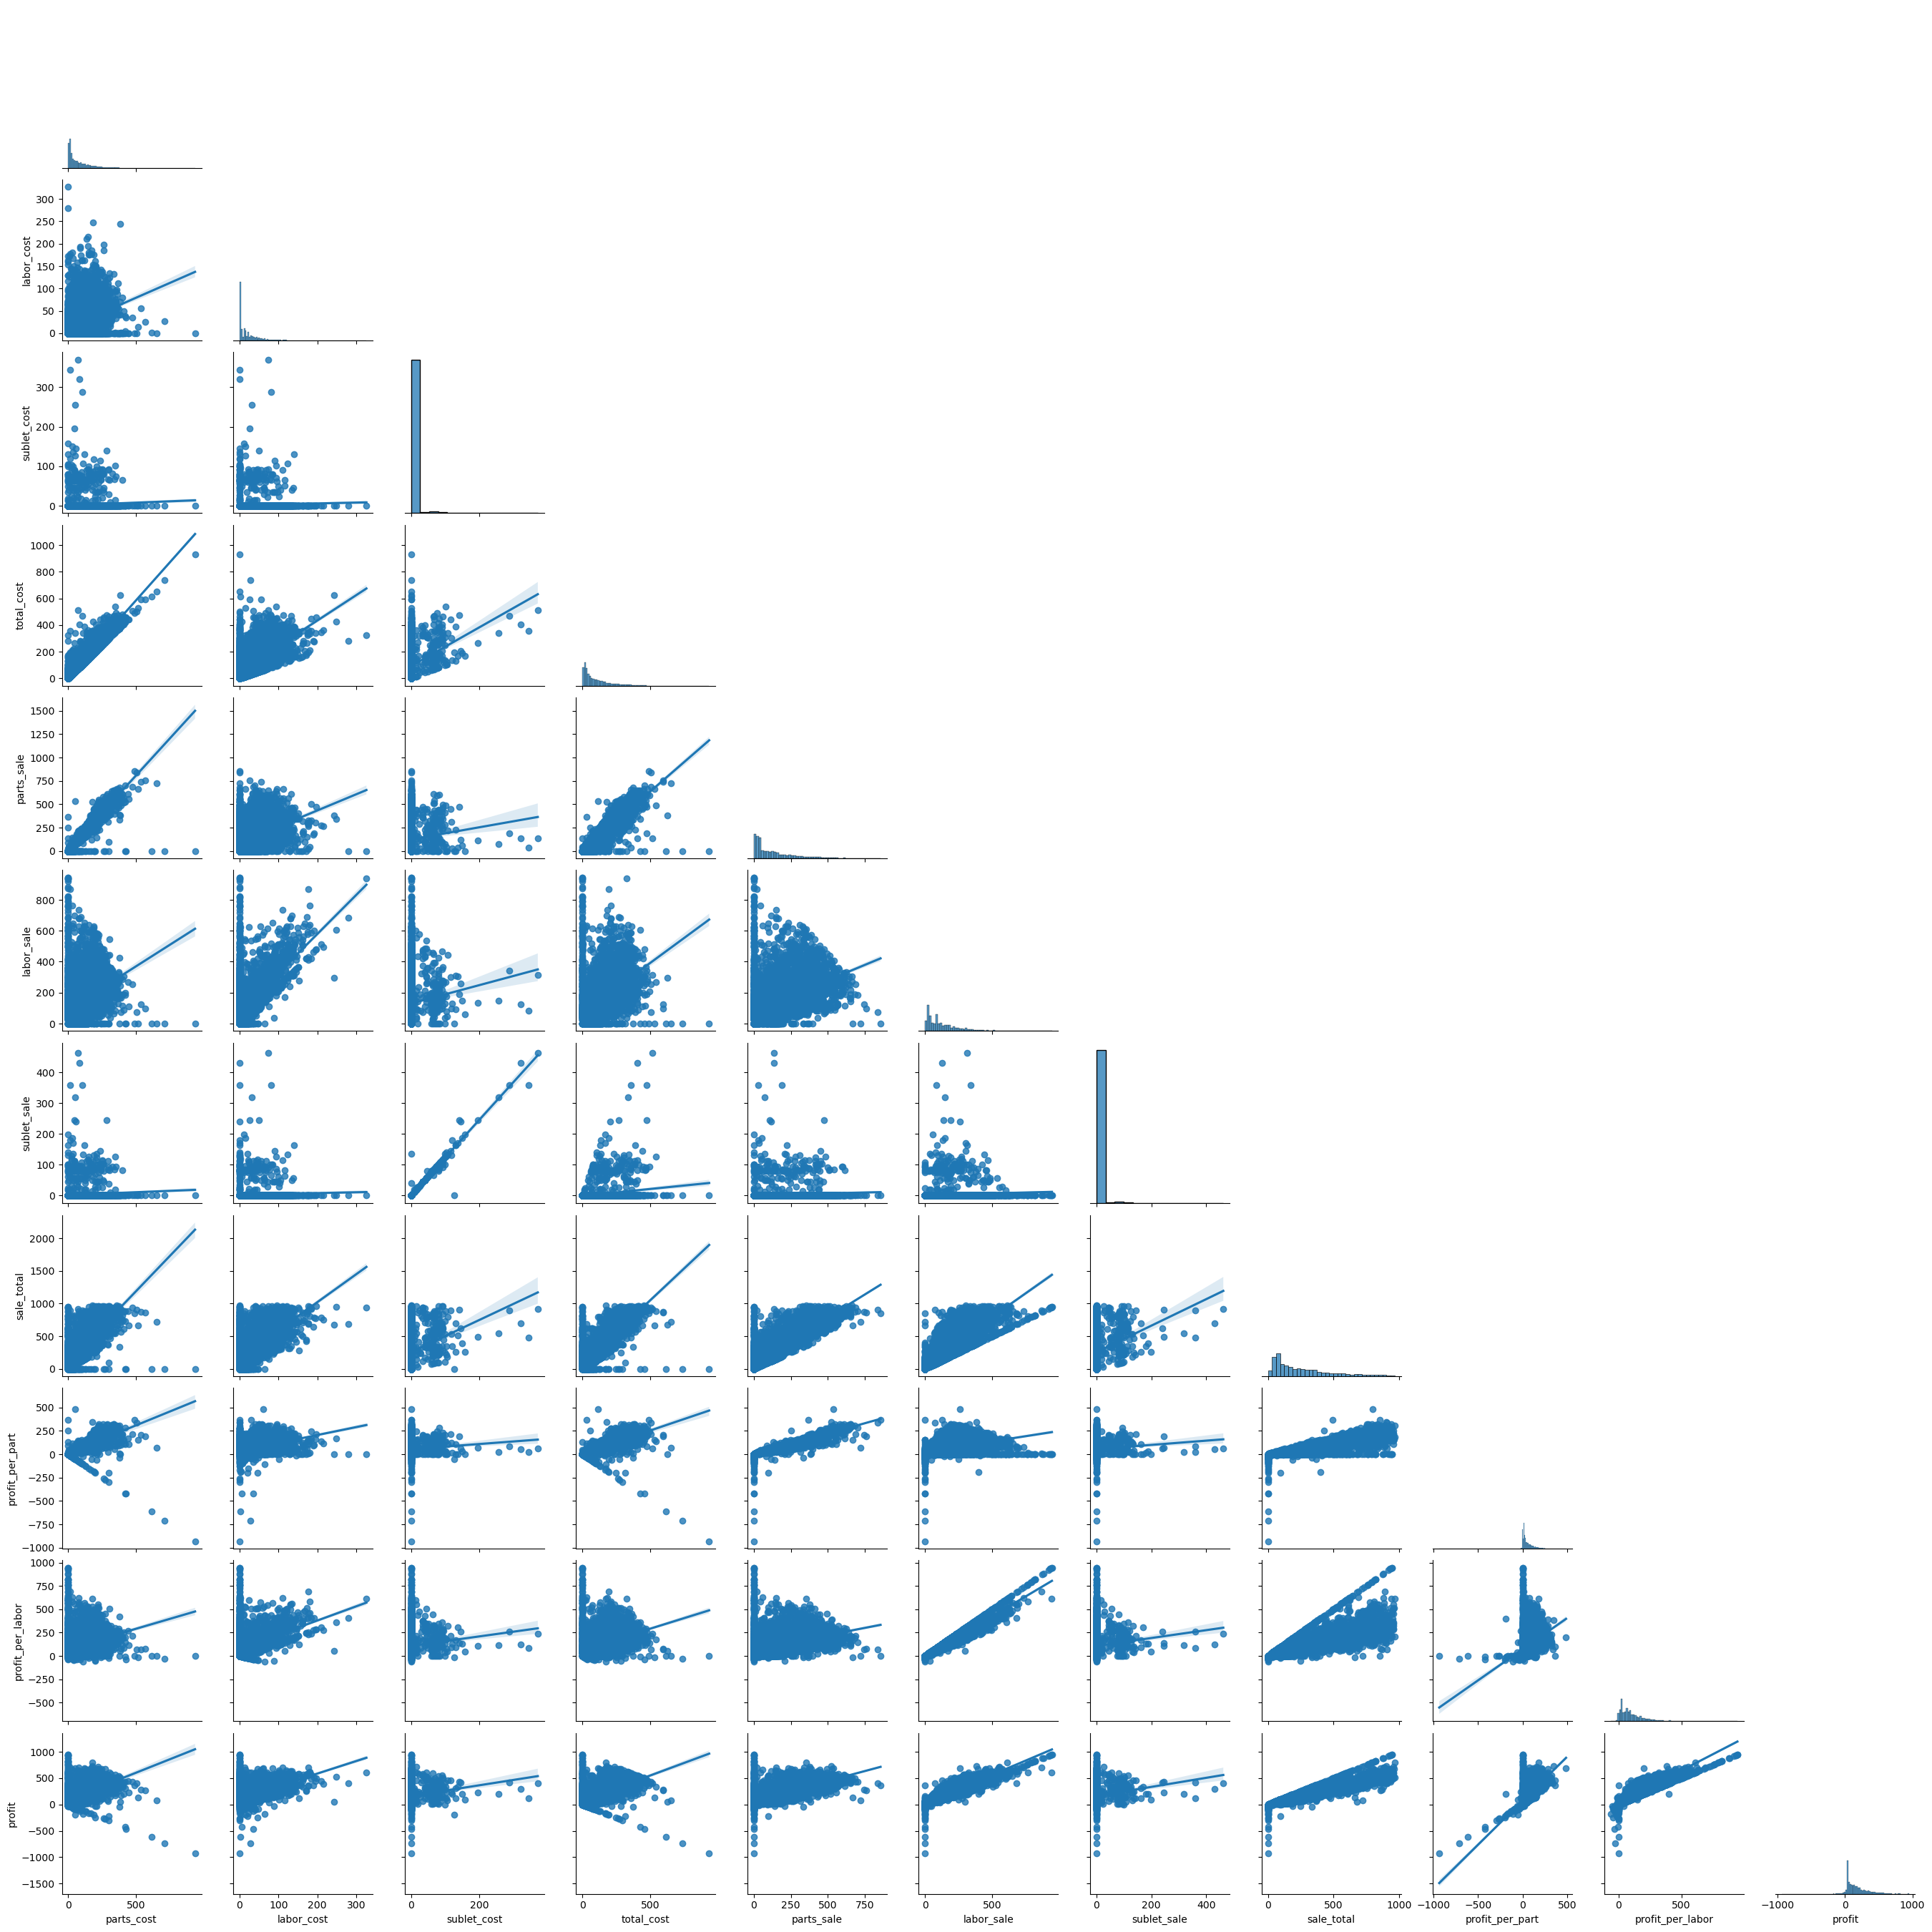

In [24]:
sns.pairplot(data=train,corner=True, kind='reg')
plt.show()

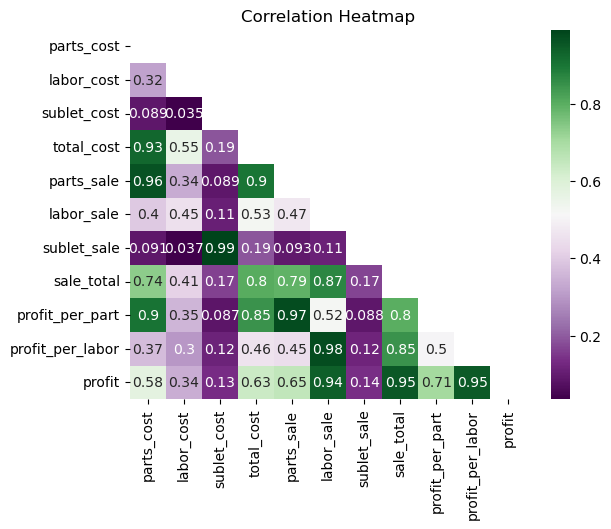

In [46]:
ex.plot_heatmap(train)

## 1. Is there a relationship between labor sale and parts sale?

* Hypothesize
* Visualize
* Analyze
* Summarize

$H_0$: There is no relationship between labor sale and parts sale

$H_a$: There is a relationship between labor sale and parts sale

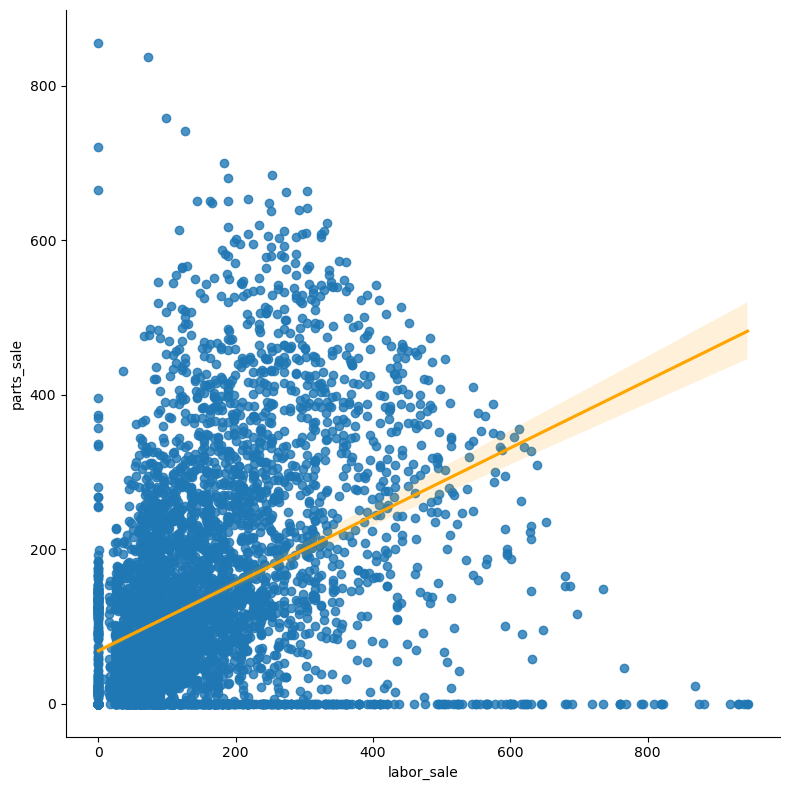

In [47]:
sns.lmplot(data=train, x='labor_sale', y='parts_sale',size=8,line_kws={'color':'orange'})
plt.show()

In [48]:
# shapiro test
sc.shapiro_test(train.labor_sale)

p-value = 0.0000000000 < 0.05
----
Not Normal Distribution


In [49]:
# shapiro test
sc.shapiro_test(train.parts_sale)

p-value = 0.0000000000 < 0.05
----
Not Normal Distribution


In [50]:
sc.conclude_spearmanr(train.labor_sale, train.parts_sale)

Non-Parametric data: Spearman's R test successful...
r (correlation value): 0.47057369040584557
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


## 2. Is there a relationship labor cost and parts cost?

$H_0$: There is no relationship between labor cost and parts cost

$H_a$: There is a relationship between labor cost and parts cost

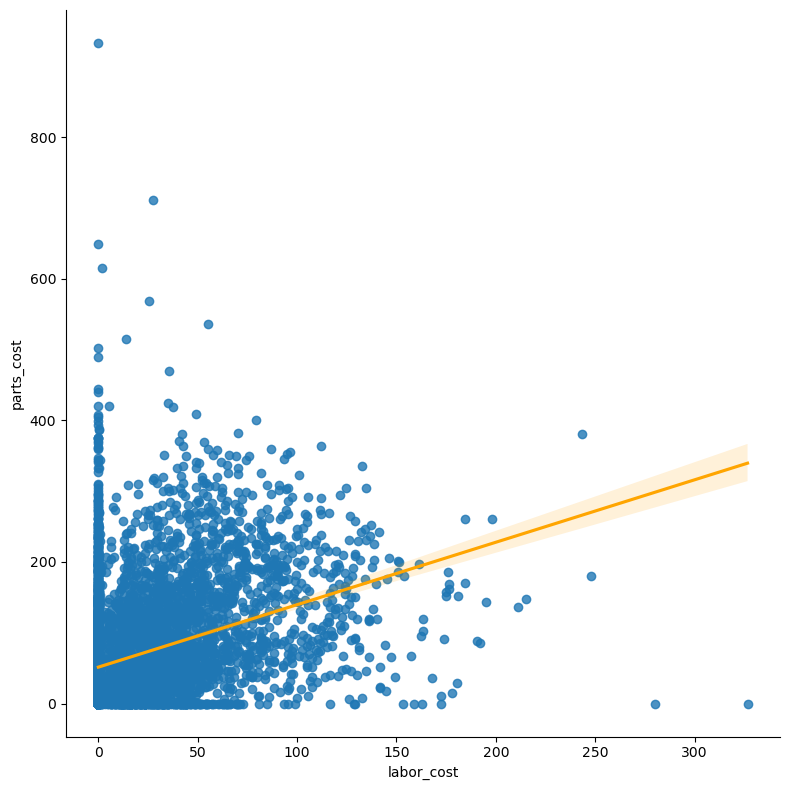

In [51]:
sns.lmplot(data=train, x='labor_cost', y='parts_cost', size=8, line_kws={'color':'orange'})
plt.show()

In [52]:
sc.shapiro_test(train.labor_cost)

p-value = 0.0000000000 < 0.05
----
Not Normal Distribution


In [53]:
sc.shapiro_test(train.labor_sale)

p-value = 0.0000000000 < 0.05
----
Not Normal Distribution


In [54]:
sc.conclude_spearmanr(train.labor_cost, train.labor_sale)

Non-Parametric data: Spearman's R test successful...
r (correlation value): 0.450071017016962
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


## 3. Is the mean of parts cost equal to the mean of parts sale?

$H_0$: The means are equal between parts cost and parts sale

$H_a$: The means are not equal between parts cost and parts sale

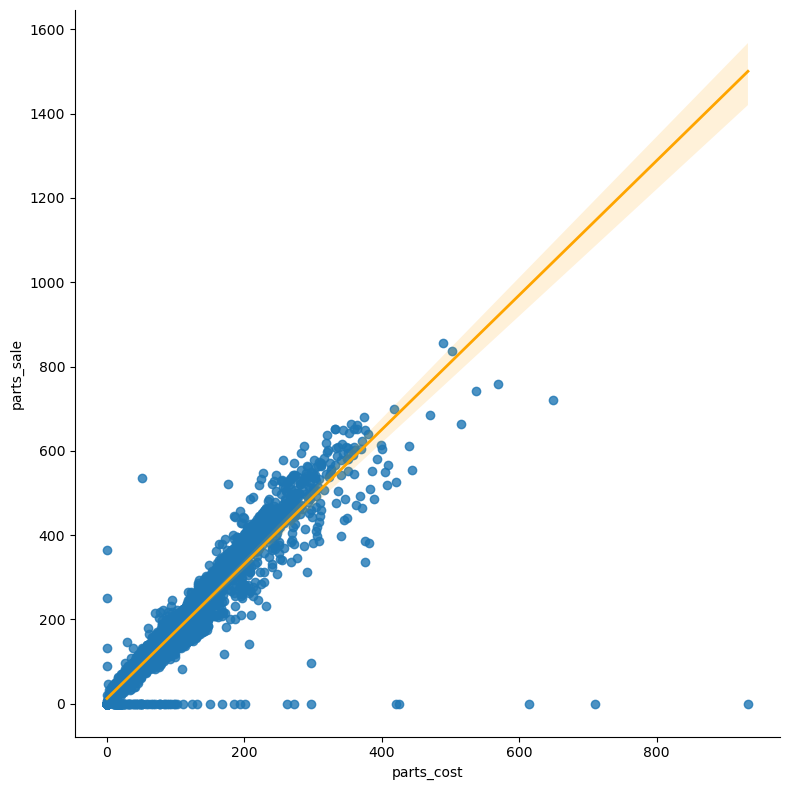

In [55]:
sns.lmplot(data=train, x='parts_cost', y='parts_sale', size=8, line_kws=({'color':'orange', 'linewidth':'2'}))
plt.show()

In [56]:
sc.shapiro_test(train.parts_cost)

p-value = 0.0000000000 < 0.05
----
Not Normal Distribution


In [57]:
sc.shapiro_test(train.parts_sale)

p-value = 0.0000000000 < 0.05
----
Not Normal Distribution


In [58]:
sc.conclude_spearmanr(train.parts_cost, train.parts_sale)

Non-Parametric data: Spearman's R test successful...
r (correlation value): 0.9628504029772711
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


## 4. Is the mean of labor cost equal to the mean of labor sale?

$H_0$: The means are equal between labor cost and labor sale

$H_a$: The means are not equal between labor cost and labor sale

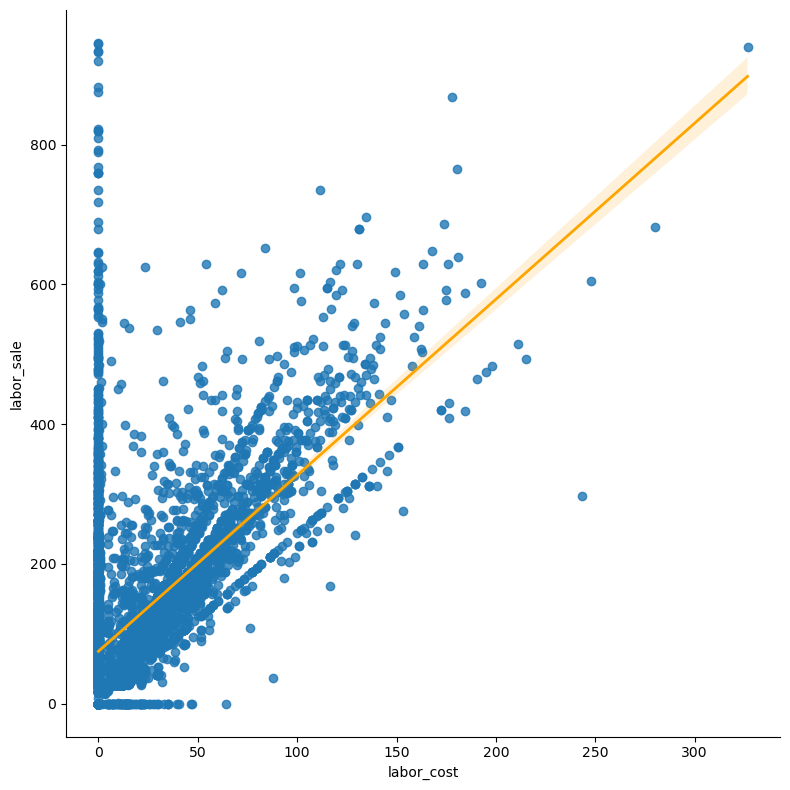

In [59]:
sns.lmplot(data=train, x='labor_cost', y='labor_sale',size=8 , line_kws=({'color':'orange', 'linewidth':'2'}))
plt.show()

In [60]:
sc.shapiro_test(train.labor_cost)

p-value = 0.0000000000 < 0.05
----
Not Normal Distribution


In [61]:
sc.shapiro_test(train.labor_sale)

p-value = 0.0000000000 < 0.05
----
Not Normal Distribution


In [62]:
sc.conclude_spearmanr(train.labor_cost, train.labor_sale)

Non-Parametric data: Spearman's R test successful...
r (correlation value): 0.450071017016962
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


## Exploration Takeaways:


* underchanging parts sales (specifically after ~1100)
* labor is average but could be improved...
* Feature engineer: Profit per part and profit per labor hour

# X_train, y_train, X_validate, y_validate, X_test, y_test

In [22]:
X_train, X_validate, X_test, y_train, y_validate, y_test = \
ex.assign_variables(train, validate, test, 'profit')

# Feature Importance

## K Best: 2

In [36]:
kbest_results = ev.select_kbest(X_train, y_train, k=4)
kbest_results

,p_value,feature_score
labor_sale,0.0,32764.760800
profit_per_labor,0.0,31615.278499
profit_per_part,0.0,6783.920257
parts_sale,0.0,5005.732639


In [37]:
# focused on labor
X_train_scaled_KBtransformed = ev.kbest_to_df(X_train, y_train, 4)
X_train_scaled_KBtransformed

,parts_sale,labor_sale,profit_per_part,profit_per_labor
4486,19.08,43.5,9.54,43.50
10290,272.71,199.5,122.72,147.84
5279,35.13,26.1,17.30,19.80
1971,30.60,168.0,16.04,159.82


In [38]:
# focused on parts
X_train_scaled_KBtransformed = ev.kbest_to_df(X_train.drop(columns={\
                                    'labor_sale', 'profit_per_labor'}), y_train, 1)
X_train_scaled_KBtransformed

,profit_per_part
4486,9.54


## RFE

In [42]:
# The top two features
all_rankings = ev.rfe(X_train, y_train, 2)
all_rankings.head(2)

,rfe_ranking
sublet_sale,1
profit_per_part,1


That's not what I thought was going to happen

# Modeling
---
* Ordinary Least Squares
* LASSO + LARS
* Polynomial Regression
* Generalized Linear Model

***Accuracy Metrics:***
* RMSE
* R2

***Features to Send In***

* train_model, validate_model, test_model df's



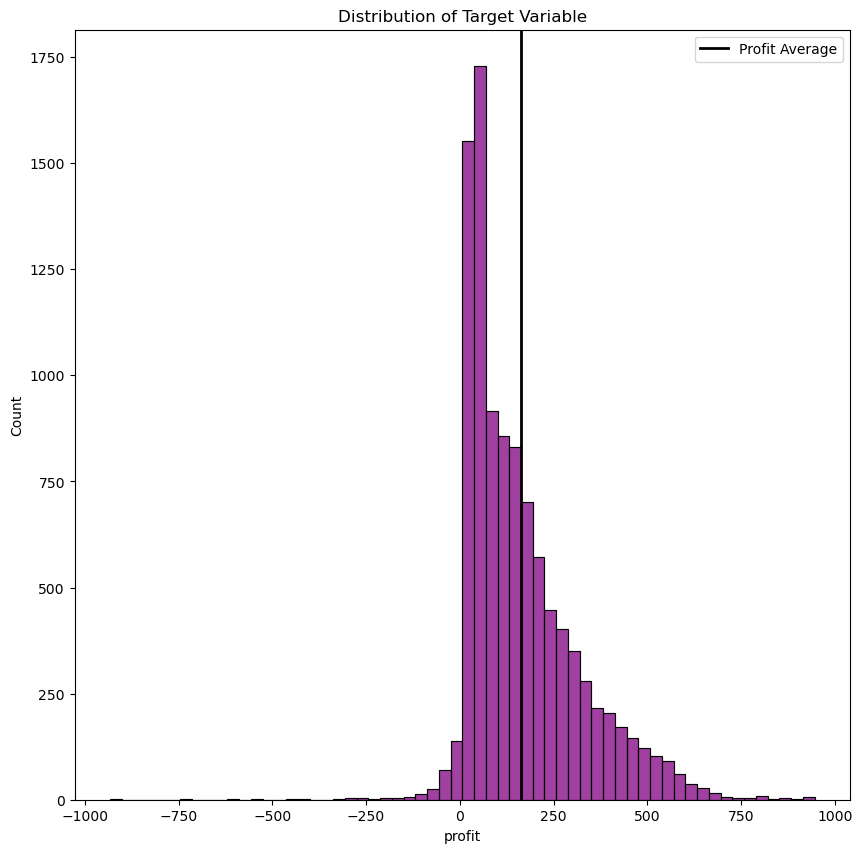

In [211]:
# plot the target variable
plt.figure(figsize=(10, 10))
sns.histplot(df_invoice.profit, bins=60, color='purple')
plt.axvline(df_invoice.profit.mean(), label='Profit Average', color='black', linewidth=2)
plt.legend()
plt.title('Distribution of Target Variable');

## Baseline

In [79]:
baseline = round(y_train.mean(),2)
baseline

163.77

In [81]:
#make an array to send into my mean_square_error function
baseline_array = np.repeat(baseline, len(X_train))
baseline_array[:5]

array([163.77, 163.77, 163.77, 163.77, 163.77])

In [82]:
rmse, r2 = ev.metrics_reg(y_train, baseline_array)
rmse, r2

(150.77939831264914, -5.910183453750051e-11)

In [83]:
metrics_df = pd.DataFrame(data=[
    {'model':'-baseline-',
     'rmse':rmse.round(2),
     'r2':r2.round(2)}])
metrics_df

,model,rmse,r2
0,-baseline-,150.78,-0.0


## **OLS**

* OLS is our standard linear regression algorithm and is computed by minimizing the sum of squared differences in the linear model (residual) with the actual data points

In [84]:
#intial ML model
lr1 = LinearRegression()

#make it
rfe = RFE(lr1, n_features_to_select=1)

#fit it
rfe.fit(X_train, y_train)

#use it on train
X_train_rfe = rfe.transform(X_train)

#use it on validate
X_val_rfe = rfe.transform(X_validate)

In [85]:
print('selected top feature:', rfe.get_feature_names_out())

selected top feature: ['profit_per_part']


In [86]:
# build the model from the top feature
#fit the thing
lr1.fit(X_train_rfe, y_train)

#use the thing (make predictions)
pred_lr1 = lr1.predict(X_train_rfe)
pred_val_lr1 = lr1.predict(X_val_rfe)

# look at predicitons
pred_lr1[:10]


array([ 88.28234511, 277.82273115, 101.27786902,  99.16777106,
       296.32795527, 372.62641779,  95.98587732,   7.49573773,
       180.59075718, 292.71064449])

In [87]:
# train
ev.metrics_reg(y_train, pred_lr1)

(103.65902650426668, 0.5273602542316895)

In [88]:
# validate
rmse, r2 = ev.metrics_reg(y_validate, pred_val_lr1)
rmse, r2

(93.72262131685979, 0.5940631625013899)

In [89]:
# add to my metrics df
metrics_df.loc[1] = ['ols_1', rmse.round(2), r2]
metrics_df

,model,rmse,r2
0,-baseline-,150.78,-0.000000
1,ols_1,93.72,0.594063


In [90]:
# examine ??
print(f'profit = {lr1.intercept_:.3} + {lr1.coef_[0]:.2} * \
{round(X_train.profit_per_part.mean(),2)} \
 = {round((-10.6 + 2.2 * 54.62),2)}')

profit = 72.3 + 1.7 * 54.62  = 109.56


In [91]:
print(f'For every 1 dollar increase in Part Sale, \
we predict a {lr1.coef_[0]:.2f} dollar increase in Profit')

For every 1 dollar increase in Part Sale, we predict a 1.67 dollar increase in Profit


### Model using OLS_1

In [95]:
#make it
lr2 = LinearRegression()

#fit it on our RFE features
lr2.fit(X_train, y_train)

#use it (make predictions)
pred_lr2 = lr2.predict(X_train)

#use it on validate
pred_val_lr2 = lr2.predict(X_validate)

In [96]:
# look at results
pred_lr2[:10]

array([ 53.04, 270.56,  37.1 , 175.86, 233.8 , 446.93,  87.34, -38.78,
       294.16, 616.03])

In [97]:
#train 
metrics_reg(y_train, pred_lr2)

(1.9247566146303865e-13, 1.0)

In [98]:
#validate
rmse, r2 = metrics_reg(y_validate, pred_val_lr2)
rmse, r2

(1.7253663000253463e-13, 1.0)

In [99]:
#add to my metrics df
metrics_df.loc[2] = ['ols', rmse.round(2), r2]
metrics_df

,model,rmse,r2
0,-baseline-,150.78,-0.000000
1,ols_1,93.72,0.594063
2,ols,0.00,1.000000


## LASSO + LARS

* LASSO = Least Absolute Shrinkage and Selection Operator
* LARS = Least Angle Regression

* Performs intrinsic feature selection and noise reduction to avoid overfitting
* The most important hyperparameter is alpha
    * alpha determines the degree of regularization applied to the model
    * The lowest alpha is zero, and this represents no regularization (identical to OLS)
    * There is no limit to alpha, but as it rises, it will reach a point where performance no longer changes (often because you've regularized all of your coefficients to zero
    * Generally speaking, the higher the alpha, the lower your risk for overfitting
    * alpha = 1.0 is a good place to start

In [137]:
#make it
lars = LassoLars(alpha=1)

#fit it
lars.fit(X_train, y_train)

#use it
pred_lars = lars.predict(X_train)
pred_val_lars = lars.predict(X_validate)
pred_test_lars = lars.predict(X_test)

In [103]:
pd.Series(lars.coef_, index=lars.feature_names_in_)

parts_cost          0.000000
labor_cost          0.000000
sublet_cost         0.000000
parts_sale          0.000000
labor_sale          0.231700
sublet_sale         0.000000
profit_per_part     0.114608
profit_per_labor    0.251061
dtype: float64

In [104]:
#train
ev.metrics_reg(y_train, pred_lars)

(93.85892363233327, 0.612504086283991)

In [105]:
#validate
rmse, r2 = ev.metrics_reg(y_validate, pred_val_lars)
rmse, r2

(92.19778050569911, 0.6071646668898245)

In [106]:
#add to my metrics df
metrics_df.loc[3] = ['lars', rmse.round(2), r2]
metrics_df

,model,rmse,r2
0,-baseline-,150.78,-0.000000
1,ols_1,93.72,0.594063
2,ols,0.00,1.000000
3,lars,92.20,0.607165


## Polynomial Regression

In [122]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [123]:
#make it
pr = LinearRegression()

#fit it
pr.fit(X_train_degree2, y_train)

#use it
pred_pr = pr.predict(X_train_degree2)
pred_val_pr = pr.predict(X_validate_degree2)

In [124]:
#train
ev.metrics_reg(y_train, pred_pr)

(2.0578865890565006e-11, 1.0)

In [125]:
#validate
rmse, r2 = ev.metrics_reg(y_validate, pred_val_pr)
rmse, r2

(1.8787244956674312e-11, 1.0)

In [126]:
#add to my metrics df
metrics_df.loc[4] = ['poly_2', rmse.round(2), r2]
metrics_df


,model,rmse,r2
0,-baseline-,150.78,-0.000000
1,ols_1,93.72,0.594063
2,ols,0.00,1.000000
3,lars,92.20,0.607165
4,poly_2,0.00,1.000000


## GLM / Tweedie

* The most flexible regression algorithm, the GLM allows for different distributions, beyond just the Normal Distribution for OLS (and other models based on OLS, like LASSO). We will use the TweedieRegressor method to create a GLM using sklearn.

* About power:
    * power = 0: Normal Distribution
    * power = 1: Poisson Distribution
    * power = (1,2): Compound Distribution
    * power = 2: Gamma Distribution
    * power = 3: Inverse Gaussian Distribution

In [189]:
#make it
glm = TweedieRegressor(power=0, alpha=1)

#fit it
glm.fit(X_train, y_train)

#use it
pred_glm = glm.predict(X_train)
pred_val_glm = glm.predict(X_validate)

In [134]:
#train
ev.metrics_reg(y_train, pred_glm)

(0.5572867471694393, 0.9999863392853844)

In [135]:
#validate
rmse, r2 = ev.metrics_reg(y_validate, pred_val_glm)
rmse, r2

(0.47714717993078376, 0.9999894785805886)

In [136]:
metrics_df.loc[5] = ['glm',rmse.round(2),r2]
metrics_df

,model,rmse,r2
0,-baseline-,150.78,-0.000000
1,ols_1,93.72,0.594063
2,ols,0.00,1.000000
3,lars,92.20,0.607165
4,poly_2,0.00,1.000000
5,glm,0.48,0.999989


## Evaluate on Best Model: LARS

In [140]:
#use it
rmse, r2 = ev.metrics_reg(y_test, pred_test_lars)
rmse, r2

(90.8221355772112, 0.6332567031102411)

## Vizzes

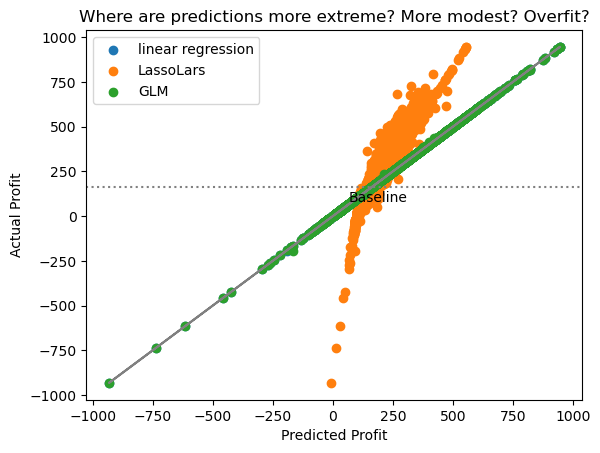

In [213]:
ev.plot_model_predictions(pred_lr2, pred_lars, pred_glm, y_train)

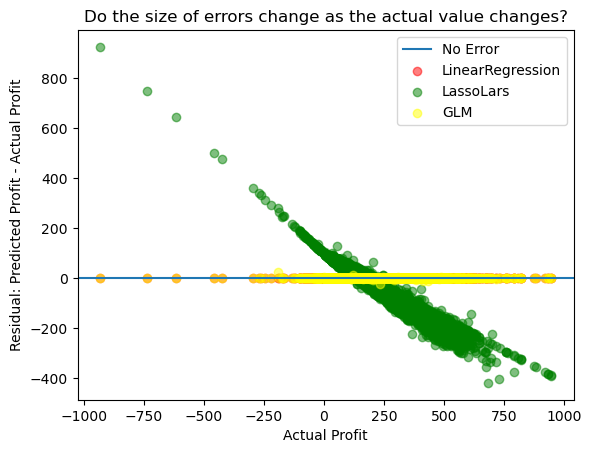

In [215]:
ev.plot_model_residuals(pred_lr2, pred_lars, pred_glm, y_train)

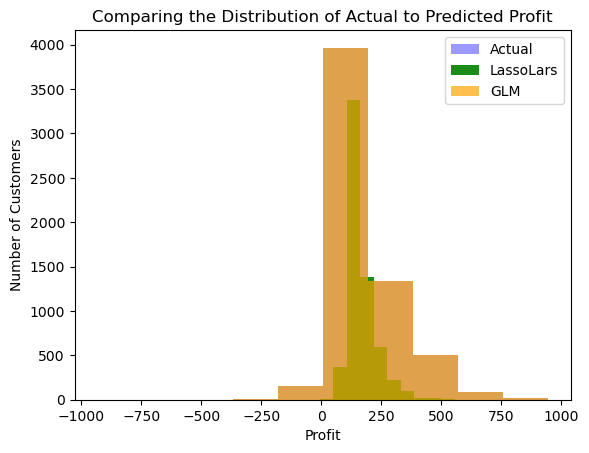

In [218]:
ev.plot_model_actual_predicted(y_train, pred_lars, pred_glm)